# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Rename all the columns to lower case

In [3]:
#Your code here
df.columns = [x.lower() for x in df.columns]
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [4]:
#Your code here
df = df.set_index('linename')


## Painstakingly change the index back

In [5]:
# Your code here
df = df.reset_index()
df.tail()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
197620,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,17:00:00,REGULAR,5554,348
197624,R,TRAM2,R469,00-05-01,RIT-ROOSEVELT,RIT,08/31/2018,21:00:00,REGULAR,5554,348


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [6]:
# Your code here

station_nums = pd.DataFrame(df.groupby('station').nunique()['linename'])
station_nums.rename(columns={'linename':'Num_Lines'}, inplace=True)
    
        
merge_df = df.merge(station_nums, on="station")
merge_df = merge_df.sort_values('Num_Lines', ascending=False)

merge_df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
77006,23,R305,R206,01-00-00,125 ST,IRT,08/25/2018,01:00:00,REGULAR,134829301,67507647,4
75799,ACBD,N026,R102,00-00-05,125 ST,IND,08/30/2018,12:00:00,REGULAR,11868480,12354814,4
75792,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,12:00:00,REGULAR,11866537,12352141,4
75793,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,16:00:00,REGULAR,11867049,12352633,4
75794,ACBD,N026,R102,00-00-05,125 ST,IND,08/29/2018,20:00:00,REGULAR,11867663,12353567,4


## Write a function to clean a column name

In [7]:
def clean(col_name):
    cleaned = col_name.title()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
merge_df.columns = [clean(col) for col in merge_df.columns] 

In [9]:
#Checking the output, we can see the results.
merge_df.columns

Index(['Linename', 'C/A', 'Unit', 'Scp', 'Station', 'Division', 'Date', 'Time',
       'Desc', 'Entries',
       'Exits                                                               ',
       'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [10]:
#Your code here
merge_df.Date = pd.to_datetime(merge_df.Date)
merge_df['Day_Of_Week'] = merge_df['Date'].dt.day_name()


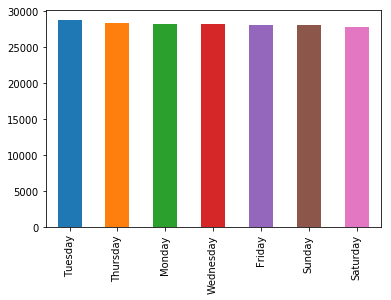

In [19]:
merge_df['Day_Of_Week'].value_counts().plot(kind='bar')
# .plot(kind='bar')
# plt.show()


## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [20]:
#Your code here

## Drop a couple of columns

In [26]:
# Your code here
merge_df.drop(['C/A', 'Unit'], axis=1)

,Linename,Scp,Station,Division,Date,Time,Desc,Entries,Exits,Num_Lines,Day_Of_Week
77006,23,01-00-00,125 ST,IRT,2018-08-25,01:00:00,REGULAR,134829301,67507647,4,Saturday
75799,ACBD,00-00-05,125 ST,IND,2018-08-30,12:00:00,REGULAR,11868480,12354814,4,Thursday
75792,ACBD,00-00-05,125 ST,IND,2018-08-29,12:00:00,REGULAR,11866537,12352141,4,Wednesday
75793,ACBD,00-00-05,125 ST,IND,2018-08-29,16:00:00,REGULAR,11867049,12352633,4,Wednesday
75794,ACBD,00-00-05,125 ST,IND,2018-08-29,20:00:00,REGULAR,11867663,12353567,4,Wednesday
75795,ACBD,00-00-05,125 ST,IND,2018-08-30,00:00:00,REGULAR,11867891,12353961,4,Thursday
75796,ACBD,00-00-05,125 ST,IND,2018-08-30,04:00:00,REGULAR,11867942,12354012,4,Thursday
75797,ACBD,00-00-05,125 ST,IND,2018-08-30,08:00:00,REGULAR,11868071,12354244,4,Thursday
75798,ACBD,00-00-05,125 ST,IND,2018-08-30,08:50:39,REGULAR,11868170,12354420,4,Thursday
75800,ACBD,00-00-05,125 ST,IND,2018-08-30,16:00:00,REGULAR,11868912,12355370,4,Thursday


## Summary

Great! You practiced your data cleanup-skills using Pandas.